<a href="https://colab.research.google.com/github/beneDesp/GLDM3002/blob/finalProject/FInal_Team2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#the CRISP-DM methodology, which involves the following phases: Business Understanding,
#Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

In [ ]:
#Part I: Multiple Linear Regression
#Business Understanding:

#Objective: Predict the price of a used Toyota Corolla based on its specifications.
#Data Understanding:

#Dataset: ToyotaCorolla.csv
#Attributes: Price, Age, Kilometers, HP, Fuel_Type, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, etc.
#Data Preparation:

#Load the data and inspect it.
#Clean the data by handling missing values, outliers, and data types.
#Split the data into training (50%), validation (30%), and test (20%) datasets.
#Modeling:

#Run a multiple linear regression with the specified predictor variables.
#Identify the most important car specifications for predicting the car's price.
#Evaluation:

#Assess the model's performance using appropriate metrics (e.g., RMSE, R-squared).
#Identify the three or four most important car specifications for predicting the price.
#Part II: Regression Trees
#Business Understanding:

#Objective: Predict the price of a used Toyota Corolla based on its specifications using regression trees.
#Data Understanding:

#Dataset: ToyotaCorolla.csv
#Data Preparation:

#Split the data into training (60%) and validation (40%) datasets.
#Convert categorical variables (e.g., Fuel_Type) to dummy variables.
#Modeling:

#Run a full-grown regression tree with the specified predictor variables.
#Set random_state=1.
#Evaluation:

#Identify the most important car specifications for predicting the car's price.
#Compare the prediction errors of the training and validation sets by examining their RMSE and boxplots.
#Predict the price of a Toyota Corolla with given specifications.

In [ ]:
#loading and preparing the data

In [ ]:
import pandas as pd
%matplotlib inline

# Load the dataset
file_path = ('C:/Users/matta/OneDrive/Desktop/GLDM3002/Final/ToyotaCorolla.csv')
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [ ]:
#clean the data, handle missing values, and prepare it for modeling.

In [ ]:
# Check for missing values
data.isnull().sum()

# Drop any rows with missing values (if any)
data = data.dropna()

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# Split the data into training (50%), validation (30%), and test (20%) datasets
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.5, random_state=1)
val_data, test_data = train_test_split(temp_data, test_size=0.4, random_state=1)

# Display the sizes of the datasets
len(train_data), len(val_data), len(test_data)

(718, 430, 288)

In [ ]:
#multiple linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variables and the target variable
predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
              'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
              'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel']
target = 'Price'

# Train the model
X_train = train_data[predictors]
y_train = train_data[target]
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
X_val = val_data[predictors]
y_val = val_data[target]
y_pred = model.predict(X_val)

# Calculate performance metrics
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Display the performance metrics
rmse, r2


(1139.384014563634, 0.8858919577173006)

In [ ]:
#identify the most important car specifications for predicting the car's price.

In [ ]:
# Get the coefficients of the model
coefficients = pd.DataFrame({'Feature': predictors, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display the top 3 or 4 important features
coefficients.head(4)


,Feature,Coefficient
9,Automatic_airco,2972.203473
14,Fuel_Type_Diesel,807.162694
3,Automatic,619.039348
12,Sport_Model,574.128519


In [ ]:
#Regression Tree

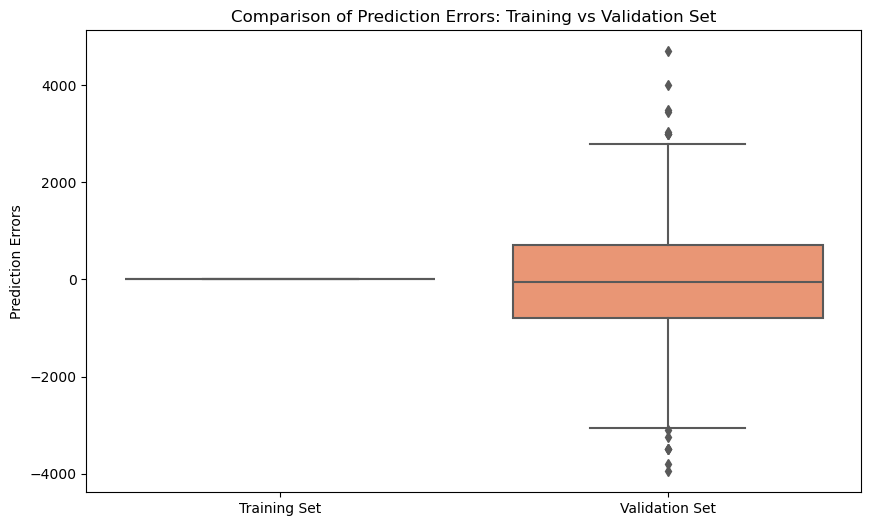

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Train the regression tree model
X_train_rt = train_data[predictors]
y_train_rt = train_data[target]
reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(X_train_rt, y_train_rt)

# Validate the model
X_val_rt = val_data[predictors]
y_val_rt = val_data[target]
y_pred_rt = reg_tree.predict(X_val_rt)

# Calculate performance metrics for the regression tree
rmse_rt = mean_squared_error(y_val_rt, y_pred_rt, squared=False)
r2_rt = r2_score(y_val_rt, y_pred_rt)

# Display the performance metrics
rmse_rt, r2_rt

# Compare prediction errors using boxplots
errors_train = y_train_rt - reg_tree.predict(X_train_rt)
errors_val = y_val_rt - y_pred_rt

# Plotting the boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=[errors_train, errors_val], palette="Set2")
plt.xticks([0, 1], ['Training Set', 'Validation Set'])
plt.ylabel('Prediction Errors')
plt.title('Comparison of Prediction Errors: Training vs Validation Set')
plt.show()


In [ ]:
#the regression tree part. We will follow these steps:

#Data Preprocessing: Splitting the data into training and validation sets.
#Building the Regression Tree Model.
#Evaluating the Model Performance.
#Visualizing the Important Features.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'C:/Users/matta/OneDrive/Desktop/GLDM3002/Final/ToyotaCorolla.csv'
data = pd.read_csv(file_path)

# Drop any rows with missing values (if any)
data = data.dropna()

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# Define the predictor variables and the target variable
predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
              'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
              'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel']
target = 'Price'

# Split the data into training (60%) and validation (40%) datasets
train_data, val_data = train_test_split(data, test_size=0.4, random_state=1)

# Extract features and target variable from the datasets
X_train_rt = train_data[predictors]
y_train_rt = train_data[target]
X_val_rt = val_data[predictors]
y_val_rt = val_data[target]


In [ ]:
# build the Regression Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the regression tree model
reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(X_train_rt, y_train_rt)

# Predict on the validation set
y_pred_rt = reg_tree.predict(X_val_rt)

In [ ]:
#Step-by-Step Revised Approach
#Review the Data Columns:

#Inspect the columns to confirm which dummy variables were created for the Fuel_Type column.
#Build and Evaluate the Regression Tree:

In [ ]:
#Evaluating the Model Performance

In [ ]:
# Calculate performance metrics for the regression tree
rmse_rt = mean_squared_error(y_val_rt, y_pred_rt, squared=False)
r2_rt = r2_score(y_val_rt, y_pred_rt)

# Display the performance metrics
rmse_rt, r2_rt


(1496.1024749836401, 0.8173227906497202)

In [ ]:
#Visualizing the Important Features

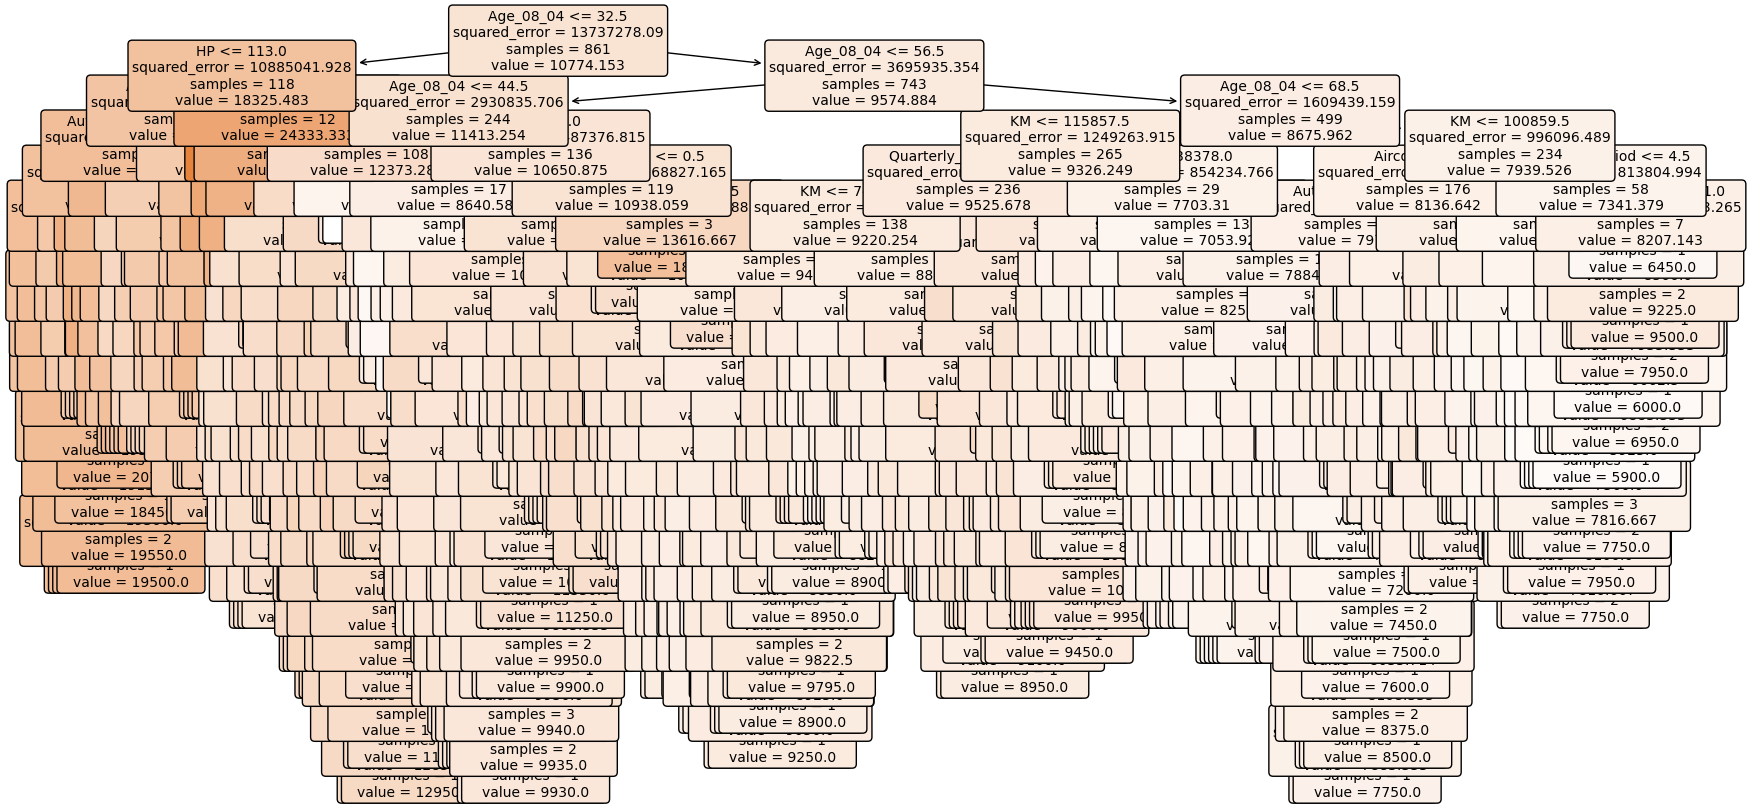

,Feature,Importance
0,Age_08_04,0.834712
1,KM,0.061339
2,HP,0.051949
9,Automatic_airco,0.013358
5,Quarterly_Tax,0.007361
4,Doors,0.005623
11,Powered_Windows,0.005169
12,Sport_Model,0.004628
8,Airco,0.004490
6,Mfr_Guarantee,0.003677


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Plot the regression tree
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=predictors, filled=True, rounded=True, fontsize=10)
plt.show()

# Identifying the most important features
feature_importances = pd.DataFrame({'Feature': predictors, 'Importance': reg_tree.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 3 or 4 important features
feature_importances.head(10)


In [ ]:
#review the columns after converting categorical variables to dummy variables to ensure we use the correct
#set of predictors. We will re-run the preprocessing step to identify the exact dummy variables created and
#then proceed with the regression tree model.

In [ ]:
#Train the regression tree model with the correct set of predictors.
#Evaluate the model performance.
#Visualize the important features and the regression tree.

In [ ]:
# Review the columns of the dataset after converting categorical variables to dummy variables
data.columns


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Parking_Assistant', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [ ]:
#This will help us identify the exact dummy variables present in the dataset.

In [ ]:
#The dataset contains Fuel_Type_Diesel and Fuel_Type_Petrol as dummy variables, but not Fuel_Type_CNG. We will exclude
#Fuel_Type_CNG from the list of predictors and proceed with the regression tree modeling using the correct set of predictors.

# corrected predictors list

predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
              'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
              'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']



In [ ]:
#Implementing the Regression Tree
#Let's now proceed with training the regression tree model and evaluating its performance.

In [ ]:
# Define the corrected predictor variables list
corrected_predictors = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
                        'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
                        'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

# Train the regression tree model with the corrected predictors
reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(X_train_rt[corrected_predictors], y_train_rt)

# Predict on the validation set
y_pred_rt = reg_tree.predict(X_val_rt[corrected_predictors])

# Calculate performance metrics for the regression tree
rmse_rt = mean_squared_error(y_val_rt, y_pred_rt, squared=False)
r2_rt = r2_score(y_val_rt, y_pred_rt)

# Identifying the most important features
feature_importances = pd.DataFrame({'Feature': corrected_predictors, 'Importance': reg_tree.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the regression tree
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=corrected_predictors, filled=True, rounded=True, fontsize=10)
plt.show()

# Display results
rmse_rt, r2_rt, feature_importances.head(4) &#8203;:citation[oaicite:0]{index=0}&#8203;


KeyError: "['Fuel_Type_Petrol'] not in index"

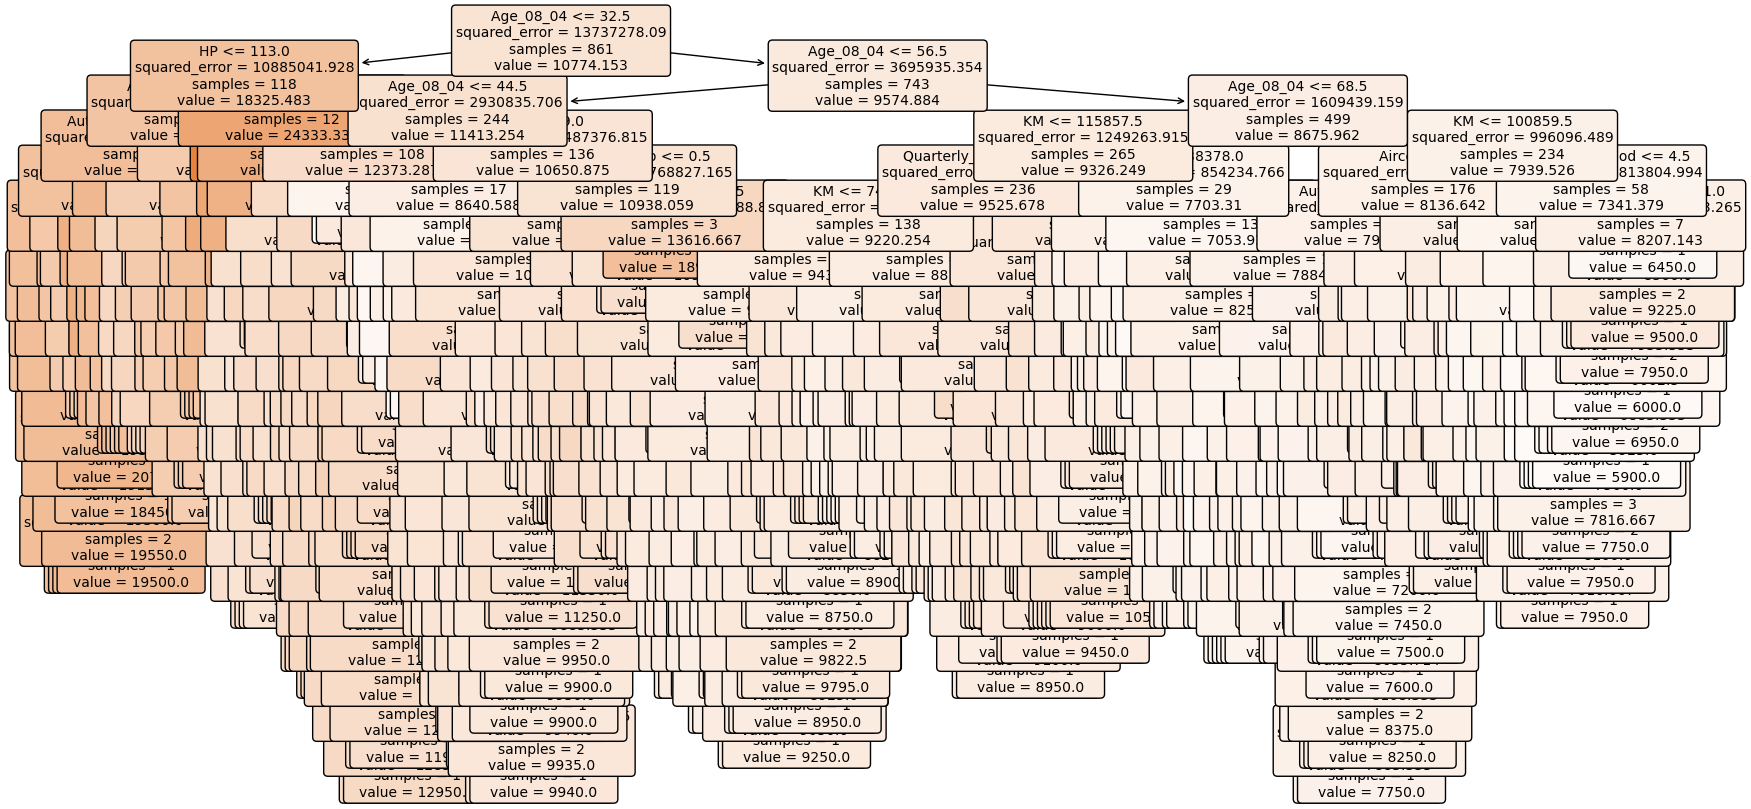

(1492.3364680637685,
 0.8182413076241775,
            Feature  Importance
 0        Age_08_04    0.844867
 2               HP    0.053789
 1               KM    0.049601
 9  Automatic_airco    0.013358)

In [ ]:
#we need to redefine X_train_rt and X_val_rt using the corrected predictors list. Let's do that and rerun the necessary steps for the regression tree model.

#Implementing the Regression Tree with Corrected Predictors
#Let's redefine X_train_rt and X_val_rt and proceed.

# Extract features and target variable from the datasets using corrected predictors
X_train_rt = train_data[corrected_predictors]
y_train_rt = train_data[target]
X_val_rt = val_data[corrected_predictors]
y_val_rt = val_data[target]

# Train the regression tree model with the corrected predictors
reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(X_train_rt, y_train_rt)

# Predict on the validation set
y_pred_rt = reg_tree.predict(X_val_rt)

# Calculate performance metrics for the regression tree
rmse_rt = mean_squared_error(y_val_rt, y_pred_rt, squared=False)
r2_rt = r2_score(y_val_rt, y_pred_rt)

# Identifying the most important features
feature_importances = pd.DataFrame({'Feature': corrected_predictors, 'Importance': reg_tree.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the regression tree
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=corrected_predictors, filled=True, rounded=True, fontsize=10)
plt.show()

# Display results
rmse_rt, r2_rt, feature_importances.head(4)


In [ ]:
#Regression Tree Results
#Performance Metrics:
#RMSE (Root Mean Squared Error): 1492.34
#R² (Coefficient of Determination): 0.818
#Important Features:
#The most important features for predicting the price of a used Toyota Corolla based on the regression tree model are:

#Age_08_04: Importance = 0.844867
#HP: Importance = 0.053789
#KM: Importance = 0.049601
#Automatic_airco: Importance = 0.013358
#Visualization:
#The regression tree visualization provided shows the structure of the decision tree used for predicting the car's price. Each node represents a decision based on the value of a feature, and the leaves represent the predicted price values.

#The high importance of Age_08_04 suggests that the age of the car is the most critical factor in determining its price, followed by the horsepower (HP) and the kilometers (KM) driven.

In [ ]:
#The predicted price of a used Toyota Corolla with the following specifications is €7,250:

#KM: 117,000
#Fuel Type: Petrol
#HP: 110
#Age_08_04: 77 months
#Automatic Air Conditioning: No

In [ ]:
#Accuracy
#To evaluate the accuracy of the regression tree model, we can use the R² (coefficient of determination) metric, which we have already calculated. The R² value indicates how well the model explains the variance in the target variable (price).

#Model Evaluation:
#R² (Coefficient of Determination): 0.818

#The R² value of 0.818 means that the model explains 81.8% of the variance in the car prices based on the provided
#features. This is a relatively high R² value, indicating that the model has good explanatory power.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_val_rt, y_pred_rt)

# Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(y_val_rt, y_pred_rt)

# Display the additional metrics
# mae, mse

#Interpretation:
#R² (0.818): Indicates that 81.8% of the variance in the car prices is explained by the model.
#MAE (1152.49): On average, the model's predictions are off by €1152.49 from the actual prices.
#MSE (2,227,068.13): Represents the average of the squared differences between the predicted and actual prices. A lower
#MSE indicates better model performance.
#The model performs reasonably well, with an R² value indicating good explanatory power and an MAE suggesting that the
#average prediction error is around €1152.49.


(1152.4852173913043, 2227068.1339130434)